In [15]:
#Name = "Xubo Wang","Bella Yang","Fred"


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def dateFix(oldDate):
    newDate = oldDate[3:]+ '/'+ oldDate[:2]
    return(newDate)
def nanchange(item):
    if (item != item):
        item = -1
    return (item)

raw = pd.read_csv('RaccoonCreekFlowData.txt', sep = '\t', skiprows = 31)
raw = raw.rename(columns = {'agency_cd':'agency','site_no':'site_Number','tz_cd':'Time_Zone','110246_00065':'Gage_Height','110247_00060':'Discharge','110248_00045':'Precipitation'})

#drop the columns with qualification codes and the column of precipitation with no data
raw = raw.drop(['110246_00065_cd','110247_00060_cd','110248_00045_cd','Precipitation','agency','site_Number'],axis=1)

#split date and time
raw['Date'] = raw['datetime'].str.split(' ').str.get(0) 
raw['Time'] = raw['datetime'].str.split(' ').str.get(1)
raw = raw.drop(['datetime'],axis=1)
raw = raw[['Date','Time','Time_Zone','Gage_Height','Discharge']]
#print(raw)


In [2]:

#average out discharge and gage height
raw2 = raw.groupby(by='Date').mean()
raw2 = raw2.reset_index()
print(raw2)


#modify date to match precipitation
raw3 = raw2.copy()
raw3['Date'] = raw3['Date'].str.replace('-','/')
raw3['Date'] = raw3['Date'].str.replace('2017/','17/')
raw3['Date'] = raw3['Date'].str.replace('2018/','18/')
raw3['Date'] = raw3['Date'].apply(dateFix)

#convert NaN into -1
raw4 = raw3.copy()
raw4['Gage_Height'] = raw4['Gage_Height'].apply(nanchange)
print(raw4)


#raw4 = raw3.groupby(by='Date').agg('mean')
#print(raw4)
#print(avgScore)

           Date  Gage_Height   Discharge
0    2017-08-01          NaN   16.240625
1    2017-08-02          NaN   15.691667
2    2017-08-03          NaN   20.226042
3    2017-08-04          NaN   18.687500
4    2017-08-05          NaN   15.893750
5    2017-08-06          NaN   13.691667
6    2017-08-07          NaN   13.890625
7    2017-08-08          NaN   13.736458
8    2017-08-09          NaN   12.431250
9    2017-08-10          NaN   11.722917
10   2017-08-11          NaN   11.660417
11   2017-08-12          NaN   11.644792
12   2017-08-13          NaN   10.806250
13   2017-08-14          NaN   10.352500
14   2017-08-15          NaN    9.683978
15   2017-08-16          NaN    9.332604
16   2017-08-17          NaN   10.487742
17   2017-08-18          NaN   11.905208
18   2017-08-19          NaN   11.210417
19   2017-08-20          NaN   13.547917
20   2017-08-21          NaN   12.359375
21   2017-08-22          NaN   11.897917
22   2017-08-23          NaN   12.960417
23   2017-08-24 

### Clean data for Precipitation

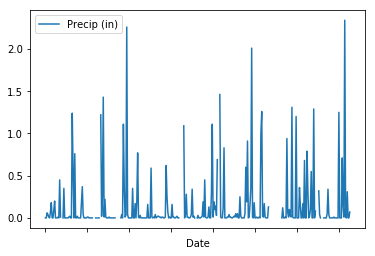

In [3]:
precip = pd.read_csv('PrecipData.csv',skiprows=5)
precip = precip.iloc[:,0:2]


precipLine = precip.plot.line(x = 'Date')


precip['Year'] = precip['Date'].str.split('/').str.get(2)

#print(precip)

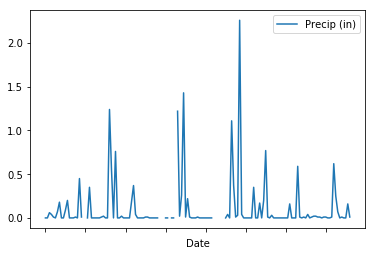

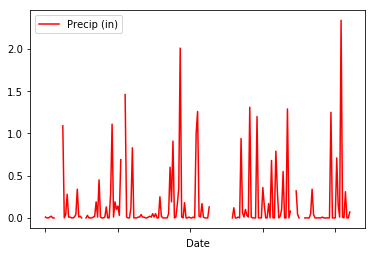

In [4]:
precip17 = precip.loc[precip['Year'] == '17']
precip18 = precip.loc[precip['Year'] == '18']

Line17 = precip17.plot.line(x = 'Date')
Line18 = precip18.plot.line(x = 'Date', color = 'red')


### Combine two Datasets 

In [35]:
#Final Data Frame 
Precip2 = precip.copy()
Precip2 = Precip2.drop(['Date','Year'],axis = 1)
#print(Precip2)
RaccoonCreek = pd.concat([raw4,Precip2],axis=1)
#RaccoonCreek = RaccoonCreek.drop(['Gage_Height'],axis=1)
print(RaccoonCreek)

         Date  Gage_Height   Discharge  Precip (in)
0    08/01/17    -1.000000   16.240625         0.00
1    08/02/17    -1.000000   15.691667         0.00
2    08/03/17    -1.000000   20.226042         0.06
3    08/04/17    -1.000000   18.687500         0.04
4    08/05/17    -1.000000   15.893750         0.01
5    08/06/17    -1.000000   13.691667         0.00
6    08/07/17    -1.000000   13.890625         0.07
7    08/08/17    -1.000000   13.736458         0.18
8    08/09/17    -1.000000   12.431250         0.00
9    08/10/17    -1.000000   11.722917         0.00
10   08/11/17    -1.000000   11.660417         0.09
11   08/12/17    -1.000000   11.644792         0.20
12   08/13/17    -1.000000   10.806250         0.00
13   08/14/17    -1.000000   10.352500         0.00
14   08/15/17    -1.000000    9.683978         0.00
15   08/16/17    -1.000000    9.332604         0.01
16   08/17/17    -1.000000   10.487742         0.00
17   08/18/17    -1.000000   11.905208         0.45
18   08/19/1

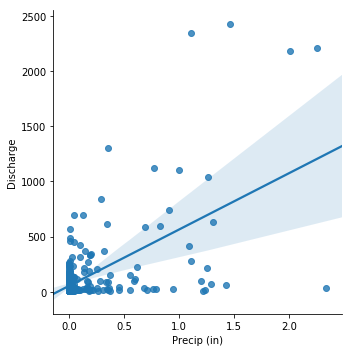

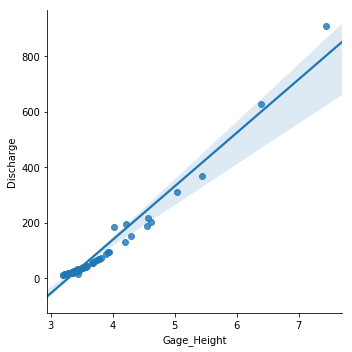

In [46]:
import seaborn as sns



#filter our the missing value of gage height which we changed to -1 before
Raccooncreek = RaccoonCreek.loc[RaccoonCreek['Gage_Height'] != -1] 

sns.lmplot(x = 'Precip (in)', y = 'Discharge', data = RaccoonCreek, fit_reg = True)

sns.lmplot(x = 'Gage_Height', y = 'Discharge', data = Raccooncreek, fit_reg = True)

plt.show()






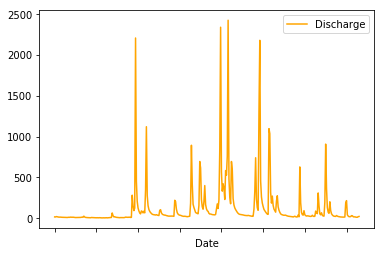

In [47]:



dischargeLine = RaccoonCreek.plot.line(x = 'Date', y = 'Discharge', color = 'orange')




